## Observations and Insights 

1. According to the data, the largest number of mice were treated with ramicane and capomulin. However, according to the statistics table, both drug regimens produced the least average growth in tumor volume in mice. 

2. The boxplots illustrating the most promising drugs showed that the data was highly variable, meaning that although the treatment may have worked for one mouse, it is not certain that the treatment will work just as well for the next mouse. 

3. The weight of the mouse is slightly negatively correlated with the growth of the tumor. The correlation coefficient was calculated to be -0.3, suggesting that the weight of the mouse is not the best indicator of how the tumor will grow. 

In [2]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np


# Study data files
mouse_metadata_path = "../../CSV_files/Mouse_metadata.csv"
study_results_path = "../../CSV_files/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
exp_data = pd.merge(mouse_metadata, study_results, on= "Mouse ID", how="left")
exp_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the DataFrame.
exp_data["Mouse ID"].value_counts()

g989    13
u364    10
a685    10
a520    10
h246    10
        ..
v199     1
h428     1
l872     1
u153     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = exp_data[exp_data.duplicated(keep="first")]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_exp_data = exp_data.drop_duplicates(subset="Mouse ID", keep="last")
clean_exp_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [23]:
# Checking the number of mice in the clean DataFrame.
clean_exp_data["Mouse ID"].value_counts()

c895    1
t565    1
i901    1
o523    1
v409    1
       ..
x111    1
f436    1
l509    1
i557    1
c139    1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group = clean_exp_data.groupby(["Drug Regimen"])
tumor_vol = drug_group["Tumor Volume (mm3)"]
# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean_tumor_vol = tumor_vol.mean()
median_tumor_vol = tumor_vol.median()
var_tumor_vol = tumor_vol.var()
sd_tumor_vol =tumor_vol.std()

In [46]:
drug_group_mean = clean_exp_data.groupby(["Drug Regimen"]).mean()
drug_group_mean["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    36.667568
Ceftamin     57.753977
Infubinol    58.178246
Ketapril     62.806191
Naftisol     61.205757
Placebo      60.508414
Propriva     56.736964
Ramicane     36.191390
Stelasyn     61.001707
Zoniferol    59.181258
Name: Tumor Volume (mm3), dtype: float64

In [47]:
drug_group_median = clean_exp_data.groupby(["Drug Regimen"]).median()
drug_group_median["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    38.125164
Ceftamin     59.851956
Infubinol    60.165180
Ketapril     64.487812
Naftisol     63.283288
Placebo      62.030594
Propriva     55.841410
Ramicane     36.561652
Stelasyn     62.192350
Zoniferol    61.840058
Name: Tumor Volume (mm3), dtype: float64

In [48]:
drug_group_var = clean_exp_data.groupby(["Drug Regimen"]).var()
drug_group_var["Tumor Volume (mm3)"]

Drug Regimen
Capomulin     32.663378
Ceftamin      69.982735
Infubinol     74.010875
Ketapril      98.921330
Naftisol     106.029927
Placebo       78.759797
Propriva      69.349002
Ramicane      32.166354
Stelasyn      90.331586
Zoniferol     76.862027
Name: Tumor Volume (mm3), dtype: float64

In [49]:
drug_group_sd = clean_exp_data.groupby(["Drug Regimen"]).std()
drug_group_sd["Tumor Volume (mm3)"]

Drug Regimen
Capomulin     5.715188
Ceftamin      8.365568
Infubinol     8.602957
Ketapril      9.945920
Naftisol     10.297083
Placebo       8.874672
Propriva      8.327605
Ramicane      5.671539
Stelasyn      9.504293
Zoniferol     8.767099
Name: Tumor Volume (mm3), dtype: float64

In [50]:
drug_group_sem = clean_exp_data.groupby(["Drug Regimen"]).sem()
drug_group_sem["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    1.143038
Ceftamin     1.673114
Infubinol    1.720591
Ketapril     1.989184
Naftisol     2.059417
Placebo      1.774934
Propriva     1.665521
Ramicane     1.134308
Stelasyn     1.940056
Zoniferol    1.753420
Name: Tumor Volume (mm3), dtype: float64

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
exp_summary_df = pd.DataFrame({"Mean": drug_group_mean["Tumor Volume (mm3)"],
                  "Median": drug_group_median["Tumor Volume (mm3)"],
                  "Variance": drug_group_var["Tumor Volume (mm3)"],
                  "Standard Deviation": drug_group_sd["Tumor Volume (mm3)"],
                  "SEM": drug_group_sem["Tumor Volume (mm3)"]}).round(2)
exp_summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,36.67,38.13,32.66,5.72,1.14
Ceftamin,57.75,59.85,69.98,8.37,1.67
Infubinol,58.18,60.17,74.01,8.60,1.72
Ketapril,62.81,64.49,98.92,9.95,1.99
Naftisol,61.21,63.28,106.03,10.30,2.06
Placebo,60.51,62.03,78.76,8.87,1.77
Propriva,56.74,55.84,69.35,8.33,1.67
Ramicane,36.19,36.56,32.17,5.67,1.13
Stelasyn,61.00,62.19,90.33,9.50,1.94


## Bar Plots

In [81]:
drug_count = exp_data.groupby(["Drug Regimen"]).count()
drug_count["Mouse ID"]

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

<IPython.core.display.Javascript object>


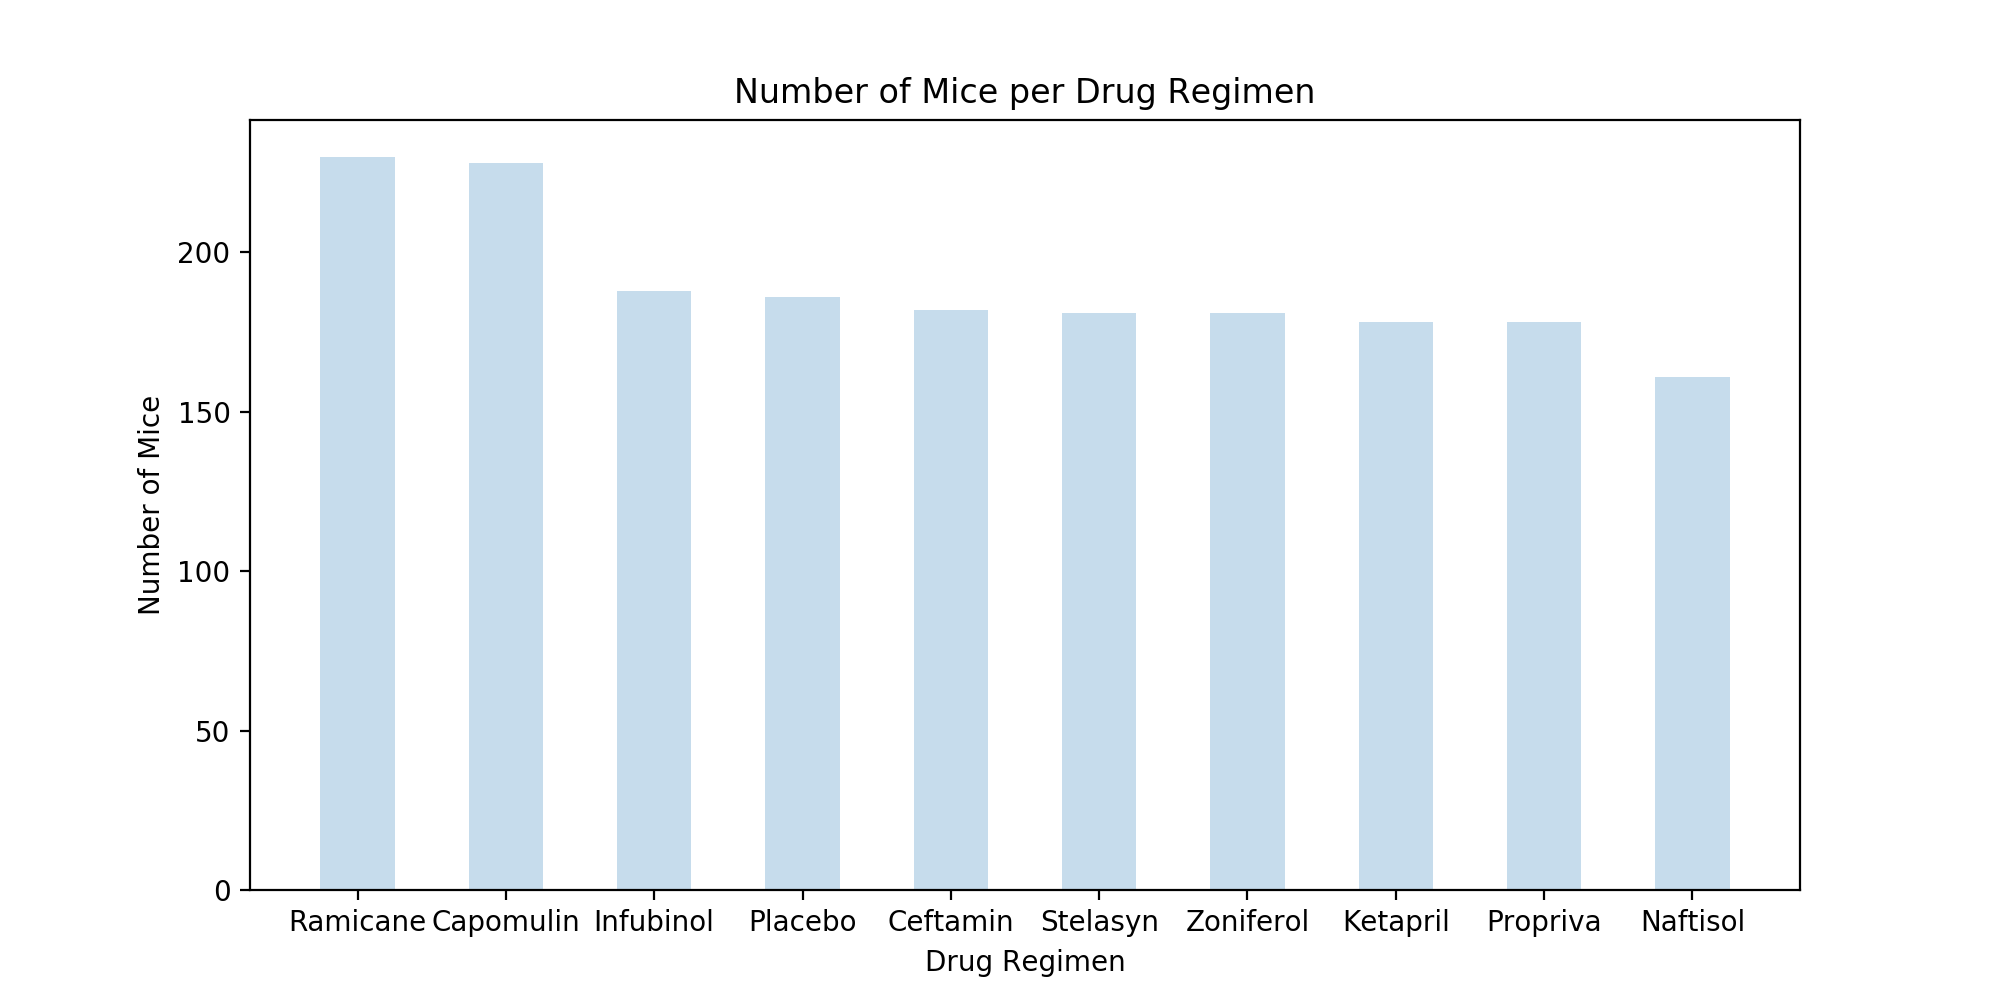

Text(0, 0.5, 'Number of Mice')

In [167]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
drugs = exp_data["Drug Regimen"].unique()
num_mice = exp_data.groupby(["Drug Regimen"]).count().sort_values(by= ["Mouse ID"], ascending= False)


f, ax = plt.subplots(figsize=(10, 5))
plt.bar(drugs, num_mice["Mouse ID"], width = 0.5, alpha = 0.25, align = "center")

plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

## Pie Plots

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_exp_data.groupby(["Sex"]).count()
gender_count["Mouse ID"]

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

<IPython.core.display.Javascript object>


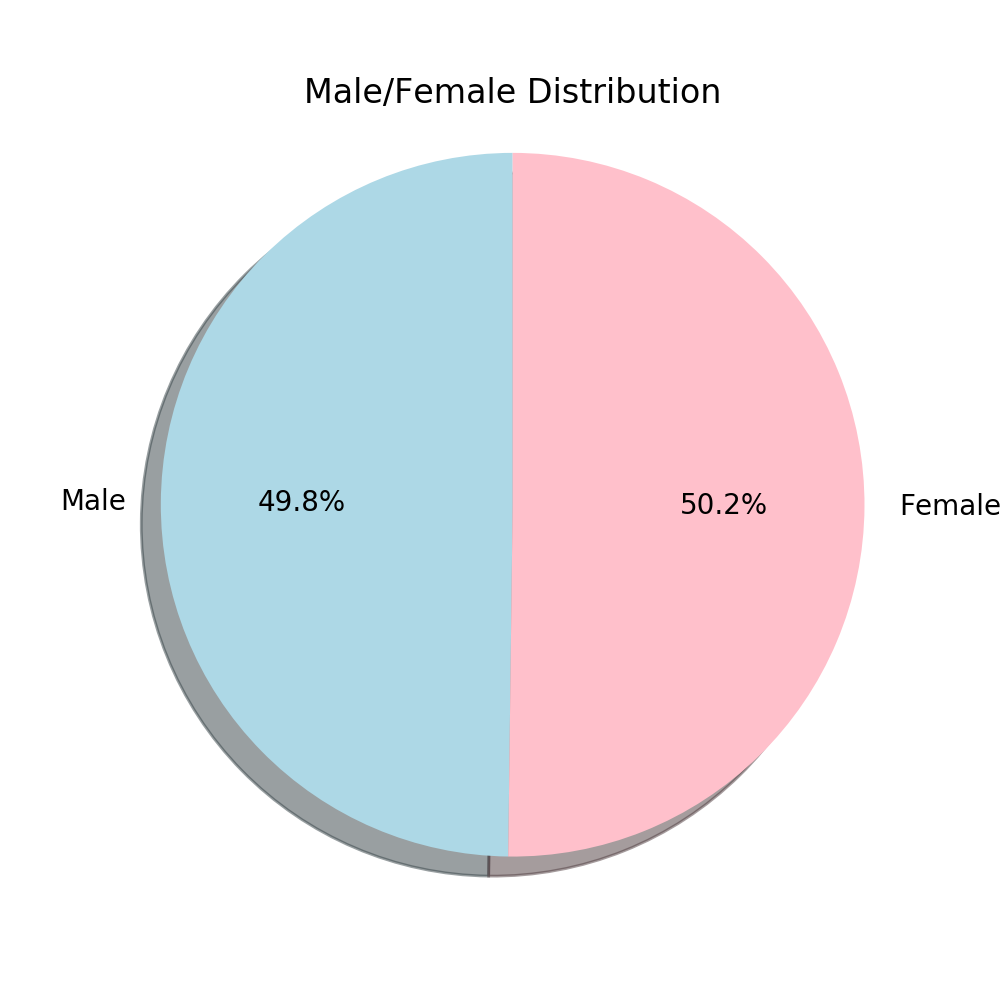

Text(0.5, 1.0, 'Male/Female Distribution')

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
value = gender_count["Mouse ID"]
colors = ["lightblue", "pink"]

f, ax= plt.subplots(figsize = (5, 5))
plt.pie(value, labels = labels, colors = colors, shadow = True, startangle = 90, autopct="%1.1f%%")
plt.axis("equal")

plt.title("Male/Female Distribution")

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

ramicane = exp_data.loc[(exp_data["Drug Regimen"] == "Ramicane")]
capomulin = exp_data.loc[(exp_data["Drug Regimen"] == "Capomulin")]
infubinol = exp_data.loc[(exp_data["Drug Regimen"] == "Infubinol")]
placebo = exp_data.loc[(exp_data["Drug Regimen"] == "Placebo")]

#ramicane
r_quartiles = ramicane["Tumor Volume (mm3)"].quantile([.25, .5, .75])
r_lowerq = r_quartiles[0.25]
r_upperq = r_quartiles[0.75]
r_iqr = r_upperq - r_lowerq

r_lower_bound = r_lowerq - (1.5*r_iqr)
r_upper_bound = r_upperq + (1.5*r_iqr)

print(f"The lower quartile for ramicane is {round(r_lowerq, 2)}.")
print(f"The upper quartile for ramicane is {round(r_upperq, 2)}.")
print(f"The interquartile range for ramicane is {round(r_iqr, 2)}.")

r_outliers = []
for vol in ramicane["Tumor Volume (mm3)"]:
    if (vol < r_lower_bound) | (vol > r_upper_bound):
        r_outliers.append(vol)
        print(f"Outliers: {r_outliers}")
if (len(r_outliers) == 0):
    print("No outliers")
print("")
print("")

    
#capomulin
c_quartiles = capomulin["Tumor Volume (mm3)"].quantile([.25, .5, .75])
c_lowerq = c_quartiles[0.25]
c_upperq = c_quartiles[0.75]
c_iqr = c_upperq - c_lowerq

c_lower_bound = c_lowerq - (1.5*c_iqr)
c_upper_bound = c_upperq + (1.5*c_iqr)

print(f"The lower quartile for capomulin is {round(c_lowerq, 2)}.")
print(f"The upper quartile for capomulin is {round(c_upperq, 2)}.")
print(f"The interquartile range for capomulin is {round(c_iqr, 2)}.")

c_outliers = []
for vol in capomulin["Tumor Volume (mm3)"]:
    if (vol < c_lower_bound) | (vol > c_upper_bound):
        c_outliers.append(vol)
        print(f"Outliers: {c_outliers}")
if (len(c_outliers) == 0):
    print("No outliers")
print("")
print("")
    
    
#infubinol
i_quartiles = infubinol["Tumor Volume (mm3)"].quantile([.25, .5, .75])
i_lowerq = i_quartiles[0.25]
i_upperq = i_quartiles[0.75]
i_iqr = i_upperq - i_lowerq

i_lower_bound = i_lowerq - (1.5*i_iqr)
i_upper_bound = i_upperq + (1.5*i_iqr)

print(f"The lower quartile for infubinol is {round(i_lowerq, 2)}.")
print(f"The upper quartile for infubinol is {round(i_upperq, 2)}.")
print(f"The interquartile range for infubinol is {round(i_iqr, 2)}.")

i_outliers = []
for vol in infubinol["Tumor Volume (mm3)"]:
    if (vol < i_lower_bound) | (vol > i_upper_bound):
        i_outliers.append(vol)
        print(f"Outliers: {i_outliers}")
if (len(i_outliers) == 0):
    print("No outliers")
print("")
print("")
    
    
#placebo
p_quartiles = placebo["Tumor Volume (mm3)"].quantile([.25, .5, .75])
p_lowerq = p_quartiles[0.25]
p_upperq = p_quartiles[0.75]
p_iqr = p_upperq - p_lowerq

p_lower_bound = p_lowerq - (1.5*p_iqr)
p_upper_bound = p_upperq + (1.5*p_iqr)

print(f"The lower quartile for placebo is {round(p_lowerq, 2)}.")
print(f"The upper quartile for placebo is {round(p_upperq, 2)}.")
print(f"The interquartile range for placebo is {round(p_iqr, 2)}.")

p_outliers = []
for vol in placebo["Tumor Volume (mm3)"]:
    if (vol < p_lower_bound) | (vol > p_upper_bound):
        p_outliers.append(vol)
        print(f"Outliers: {p_outliers}")
if (len(p_outliers) == 0):
    print("No outliers")

The lower quartile for ramicane is 36.67.
The upper quartile for ramicane is 45.0.
The interquartile range for ramicane is 8.33.
Outliers: [22.05012627]


The lower quartile for capomulin is 37.69.
The upper quartile for capomulin is 45.0.
The interquartile range for capomulin is 7.31.
Outliers: [25.47214326]
Outliers: [25.47214326, 23.34359787]


The lower quartile for infubinol is 47.31.
The upper quartile for infubinol is 57.31.
The interquartile range for infubinol is 10.0.
No outliers


The lower quartile for placebo is 47.46.
The upper quartile for placebo is 59.92.
The interquartile range for placebo is 12.46.
No outliers


<IPython.core.display.Javascript object>


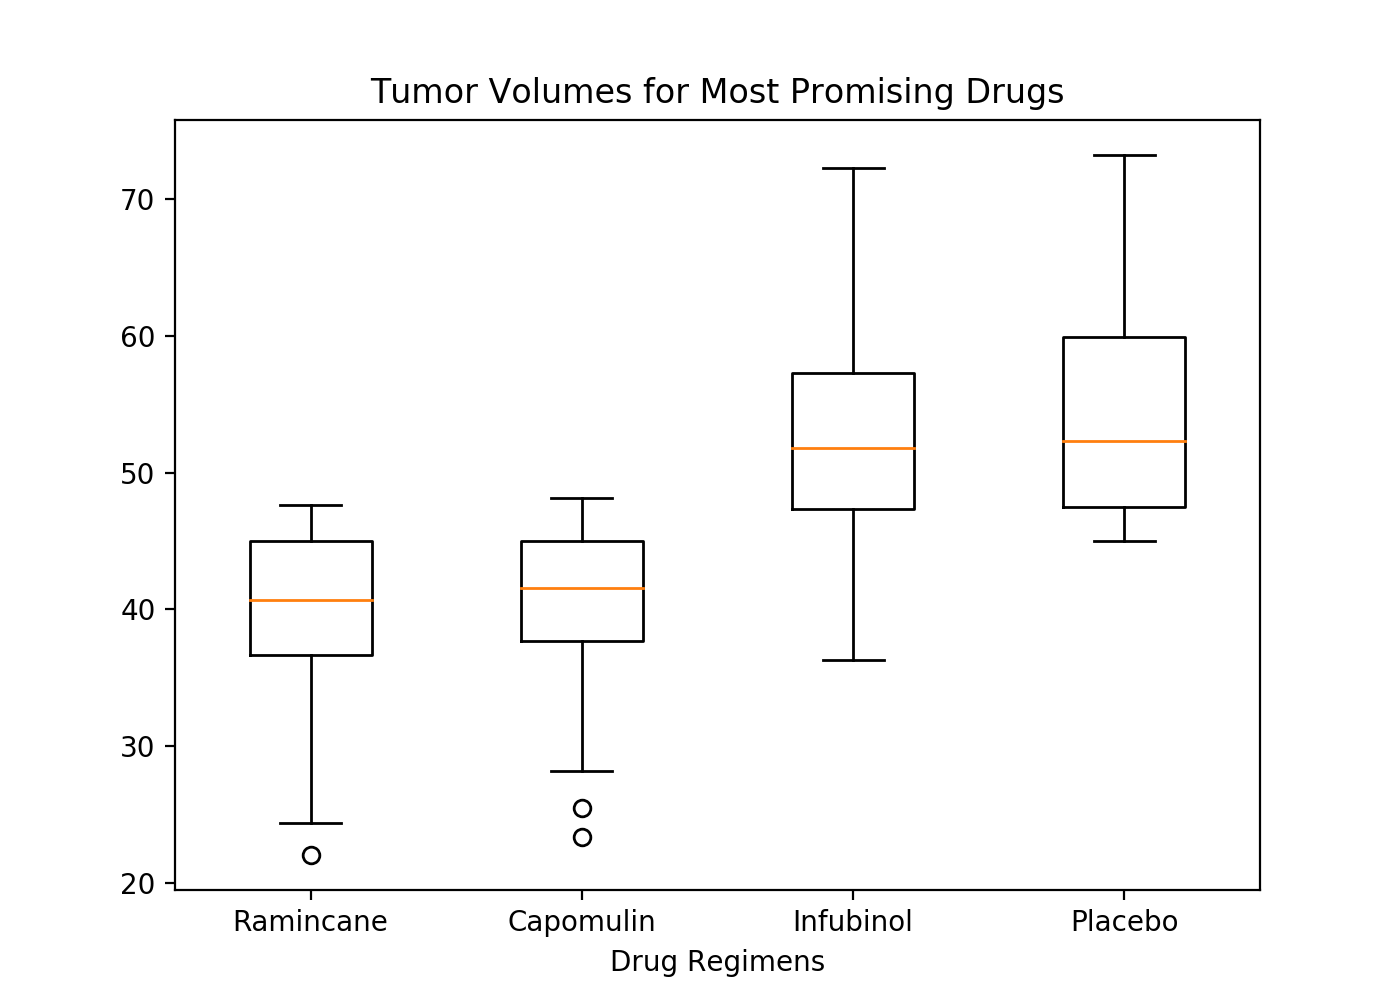

([<matplotlib.axis.XTick at 0x2246cf1cd08>,
 <a list of 4 Text xticklabel objects>)

In [44]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [ramicane["Tumor Volume (mm3)"], capomulin["Tumor Volume (mm3)"], infubinol["Tumor Volume (mm3)"], placebo["Tumor Volume (mm3)"]]
f, ax = plt.subplots(figsize=(7, 5))
ax.boxplot(data)

plt.title("Tumor Volumes for Most Promising Drugs")
plt.xlabel("Drug Regimens")
plt.xticks([1, 2, 3, 4], ["Ramincane", "Capomulin", "Infubinol", "Placebo"])

## Line and Scatter Plots

<IPython.core.display.Javascript object>


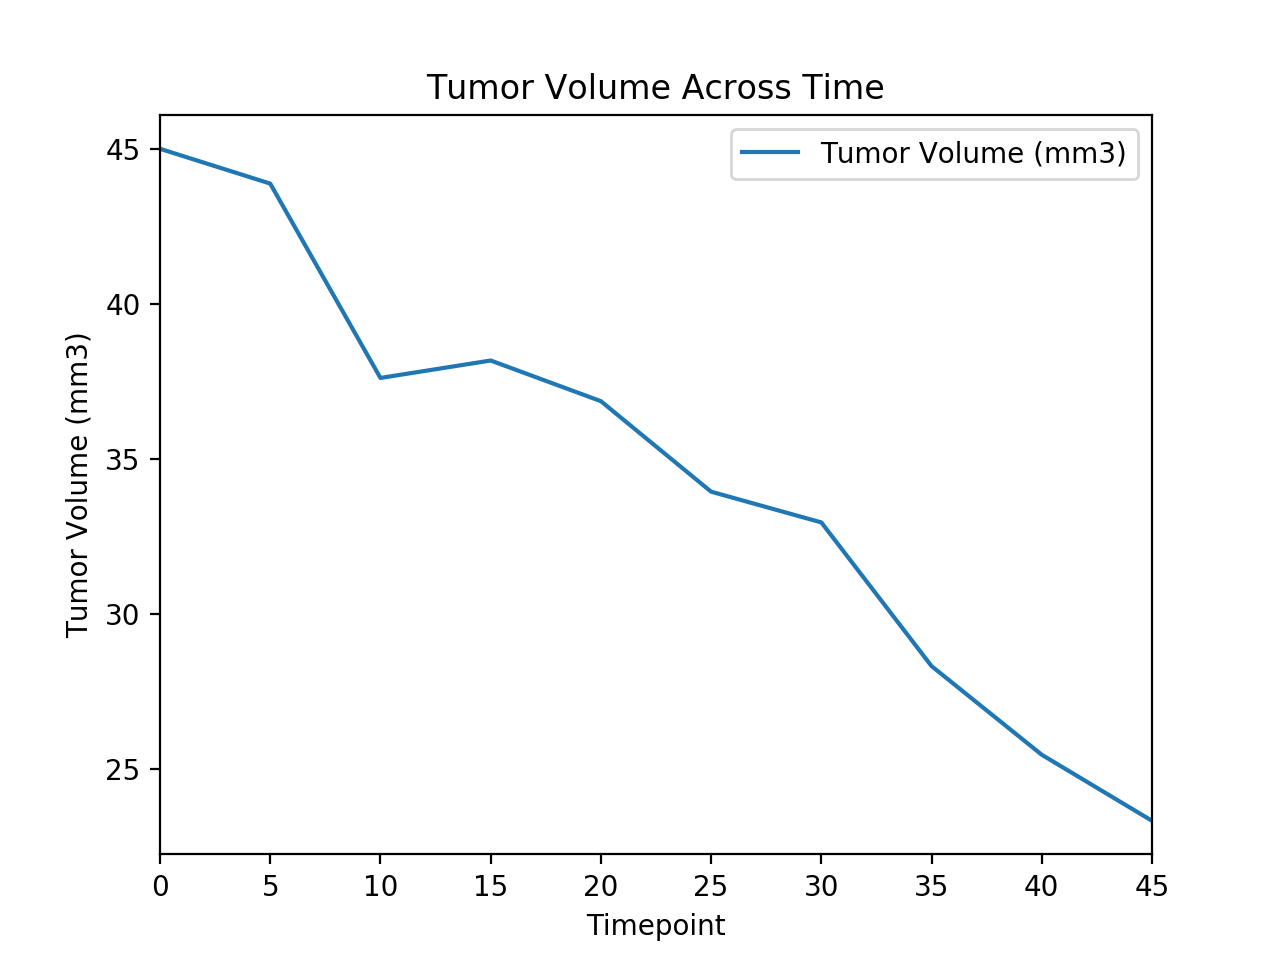

Text(0, 0.5, 'Tumor Volume (mm3)')

In [179]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_data = exp_data.loc[(exp_data["Drug Regimen"] == "Capomulin") & (exp_data["Mouse ID"] == "s185")]
cap_time_data = cap_data["Timepoint"]
cap_tumor_vol = cap_data["Tumor Volume (mm3)"]

cap_data_df = pd.DataFrame({"Timepoint": cap_time_data,
                           "Tumor Volume (mm3)": cap_tumor_vol})

time_tumor_vol = cap_data_df.plot.line(x= "Timepoint", y= "Tumor Volume (mm3)")

plt.title("Tumor Volume Across Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

<IPython.core.display.Javascript object>


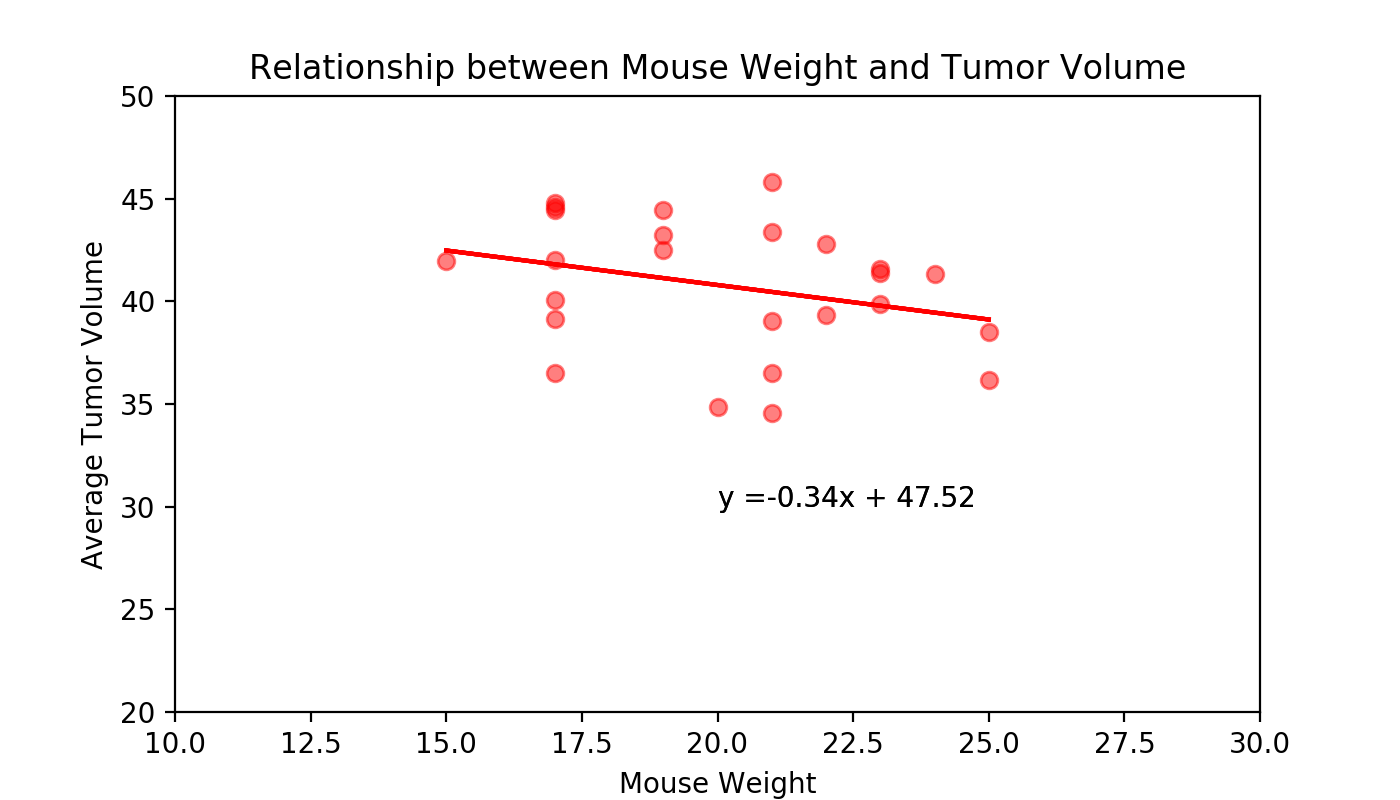

(20, 50)

In [74]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_data = exp_data.loc[(exp_data["Drug Regimen"] == "Capomulin")]
cap_mean = cap_data.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
sorted_cap_data = cap_data.sort_values(["Weight (g)"])
sorted_cap_data = sorted_cap_data.drop_duplicates("Mouse ID", keep="first") 

weight = sorted_cap_data["Weight (g)"]
cap_tumor_vol = cap_mean

f, ax=plt.subplots(figsize = (7, 4))
plt.scatter(weight, cap_tumor_vol, marker = "o", facecolor = "red", alpha = 0.5)
plt.show()


plt.title("Relationship between Mouse Weight and Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")

plt.xlim(10, 30)
plt.ylim(20, 50)

## Correlation and Regression

In [79]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#correlation coefficient
corr_coef = round(sts.pearsonr(weight, cap_tumor_vol)[0], 2)

slope, intercept, r_value, p_value, std_err = sts.linregress(weight, cap_tumor_vol)
r_squared = round(r_value**2, 2)
regress_values = weight*slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(weight, regress_values, "r-")
plt.annotate(line_eq, (20, 30), fontsize = 10, color="black")

print(f"The equation of the line is {line_eq}.")
print(f"The correlation coefficient is {corr_coef}.")
print(f"The r-squared value is {r_squared}.")

The equation of the line is y =-0.34x + 47.52.
The correlation coefficient is -0.3.
The r-squared value is 0.09.
